In [1]:
import pandas as pd

pd.set_option('max_colwidth', None)
pd.set_option('display.max_columns', 37)

In [37]:
# загрузим библиотеки
# данные библиотеки являются стандартными для пакета Anaconda
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
#данная строчка нужна для корректного отображения графиков
%matplotlib inline 

In [12]:
df = pd.read_csv('/Users/konstantinnistratov/PycharmProjects/ml_project_economic_regions/temp/merged_eco_social.csv', sep=';', index_col=0)
column_names = df.columns.tolist()
# column_names

In [13]:
list_to_get = [
    'Темпы прироста численности населения, прирост за год, в процентах',
    'Денежные доходы населения: Численность занятых, приходящихся на одного пенсионера, в среднем за год, человек',
    'Удельный вес городского населения в общей численности населения, оценка на конец года, в процентах',
    'Денежные доходы населения: Медианный среднедушевой денежный доход населения, в месяц, рублей',
    'Денежные доходы населения: Потребительские расходы в среднем на душу населения, в месяц, рублей',
    'Жилищные условия населения: Предоставление гражданам социальной поддержки (льгот) по оплате жилого помещения и коммунальных услуг: Объем средств, предусмотренных на предоставление гражданам социальной поддержки по оплате жилого помещения и коммунальных услуг, миллионов рублей',
    'Численность населения, оценка на конец года, тысяч человек',
    'Денежные доходы населения: Потребительские расходы в среднем на душу населения, в месяц, рублей',
    'Удельный вес городского населения в общей численности населения, оценка на конец года, в процентах',
    'Денежные доходы населения: Потребительские расходы в среднем на душу населения, в месяц, рублей',
    'Распределение числа выбывших по направлениям передвижения: В пределах региона, в процентах от общего числа выбывших',
    'Коэффициенты демографической нагрузки: Всего, оценка на конец года, на 1000 человек трудоспособного возраста приходится лиц нетрудоспособных возрастов',
    'Денежные доходы населения: Средний размер назначенных пенсий, на 1 января, рублей',
    'Жилищные условия населения: Предоставление гражданам социальной поддержки (льгот) по оплате жилого помещения и коммунальных услуг: Среднемесячный размер социальной поддержки на одного пользователя, рублей',
    'Возрастной состав населения: Население старше трудоспособного возраста, оценка на конец года, в процентах от общей численности населения',
    'Потребление продуктов питания: Потребление яиц на душу населения, в год, штук'
]
list_to_get = list(set(list_to_get))

for item in list_to_get:
    if item not in column_names:
        raise KeyError(f'Нету колонки {item} в column_names')

In [15]:
list_mini = [
    'Денежные доходы населения: Медианный среднедушевой денежный доход населения, в месяц, рублей',
    'Удельный вес городского населения в общей численности населения, оценка на конец года, в процентах',
    'Возрастной состав населения: Население старше трудоспособного возраста, оценка на конец года, в процентах от общей численности населения'
]

In [18]:
# work_df = df[list_to_get]
work_df = df[list_mini]
# work_df.sample(60)

In [19]:
work_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, Пензенская область to Амурская область
Data columns (total 3 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                    --------------  -----  
 0   Денежные доходы населения: Медианный среднедушевой денежный доход населения, в месяц, рублей                                              87 non-null     float64
 1   Удельный вес городского населения в общей численности населения, оценка на конец года, в процентах                                        87 non-null     float64
 2   Возрастной состав населения: Население старше трудоспособного возраста, оценка на конец года, в процентах от общей численности населения  87 non-null     float64
dtypes: float64(3)
memory usage: 2.7+

In [20]:
work_df.describe()

,"Денежные доходы населения: Медианный среднедушевой денежный доход населения, в месяц, рублей","Удельный вес городского населения в общей численности населения, оценка на конец года, в процентах","Возрастной состав населения: Население старше трудоспособного возраста, оценка на конец года, в процентах от общей численности населения"
count,87.000000,87.000000,87.000000
mean,32780.662069,71.090805,23.787356
std,12909.863087,12.863231,4.529228
min,17329.000000,30.800000,9.700000
25%,25823.850000,64.250000,22.300000
50%,29129.900000,72.500000,24.500000
75%,34068.600000,78.300000,27.000000
max,82049.700000,100.000000,30.100000


In [21]:
pd.options.mode.chained_assignment = None 
work_df[list_mini].fillna(0, inplace=True) # заменим пропуски данных нулями, в противном случае выдаст ошибку

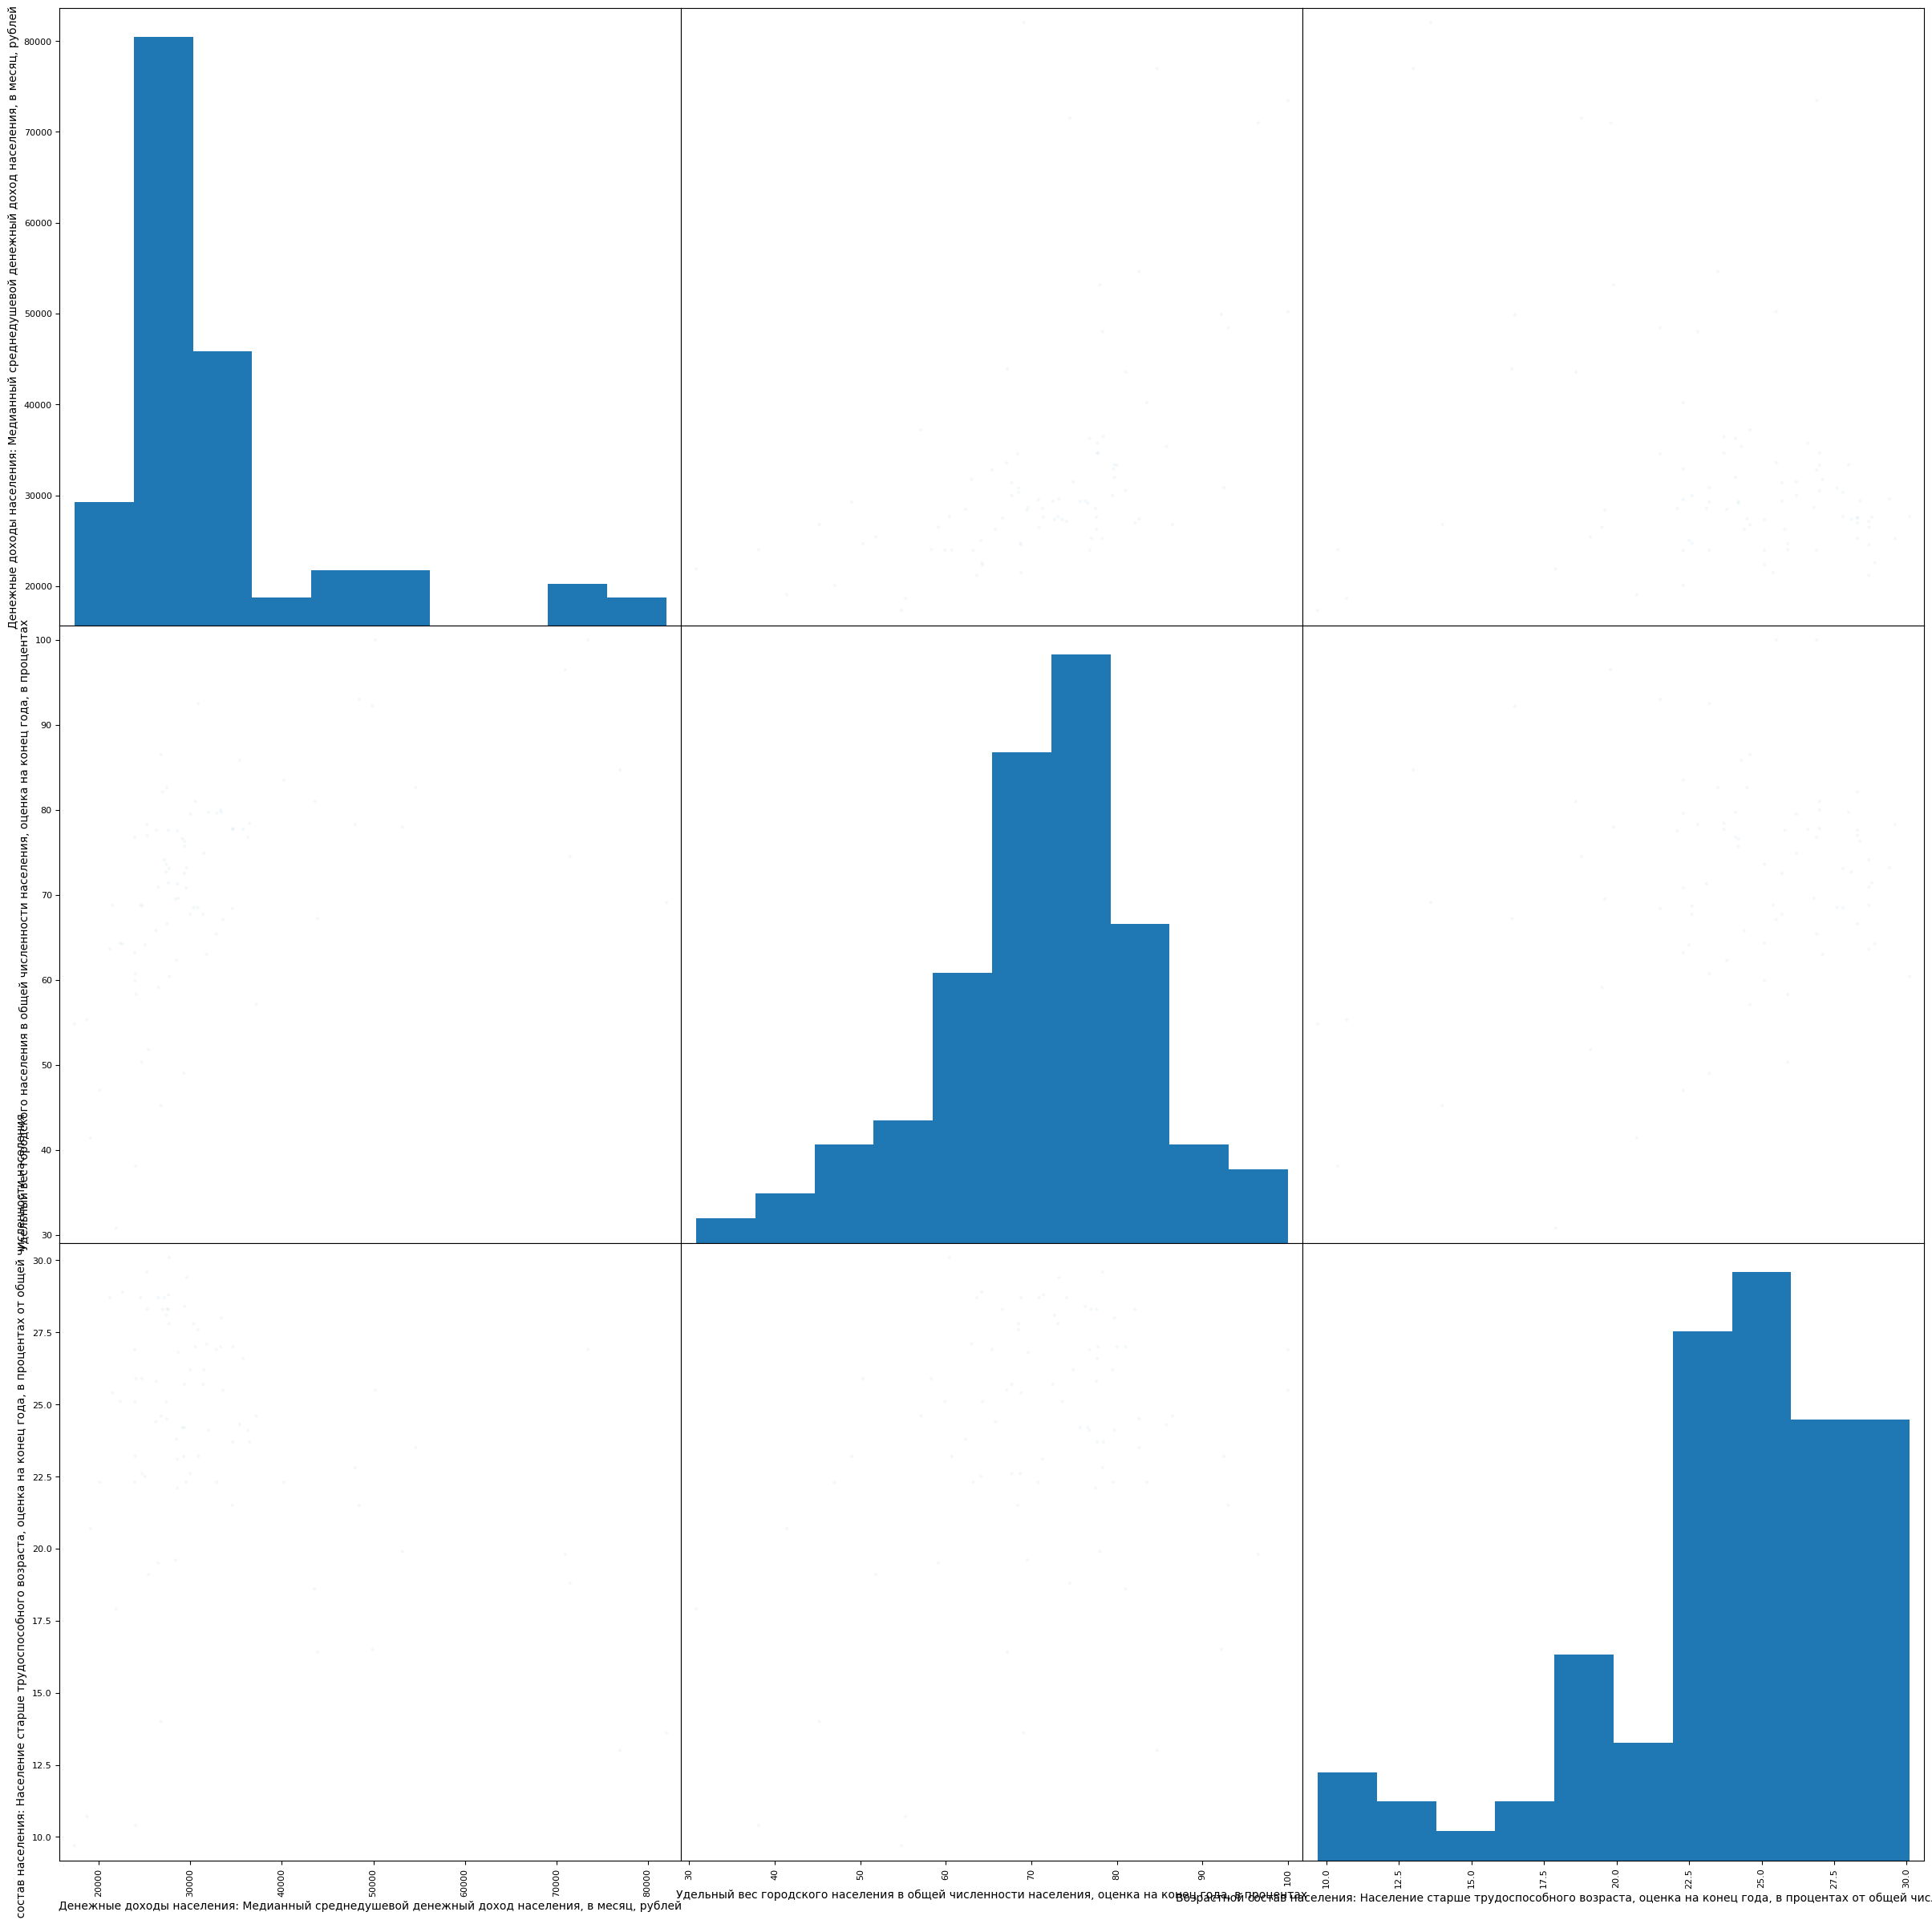

In [30]:
# матрица рассеяния и гистограммы
from pandas.plotting import scatter_matrix
scatter_matrix(work_df[list_mini], alpha=0.05, figsize=(30, 30));

In [31]:
work_df[list_mini].corr() # посмотрим на парные корреляции

,"Денежные доходы населения: Медианный среднедушевой денежный доход населения, в месяц, рублей","Удельный вес городского населения в общей численности населения, оценка на конец года, в процентах","Возрастной состав населения: Население старше трудоспособного возраста, оценка на конец года, в процентах от общей численности населения"
"Денежные доходы населения: Медианный среднедушевой денежный доход населения, в месяц, рублей",1.000000,0.523999,-0.280614
"Удельный вес городского населения в общей численности населения, оценка на конец года, в процентах",0.523999,1.000000,0.271433
"Возрастной состав населения: Население старше трудоспособного возраста, оценка на конец года, в процентах от общей численности населения",-0.280614,0.271433,1.000000


In [33]:
# загружаем библиотеку препроцесинга данных
# эта библиотека автоматически приведен данные к нормальным значениям
from sklearn import preprocessing
dataNorm = preprocessing.MinMaxScaler().fit_transform(work_df[list_mini].values)

In [38]:
# Вычислим расстояния между каждым набором данных,
# т.е. строками массива data_for_clust
# Вычисляется евклидово расстояние (по умолчанию)
from scipy.spatial.distance import pdist
data_dist = pdist(dataNorm, 'euclidean')
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в 
# специальной переменной (используется ниже для визуализации 
# и выделения количества кластеров
data_linkage = linkage(data_dist, method='average')

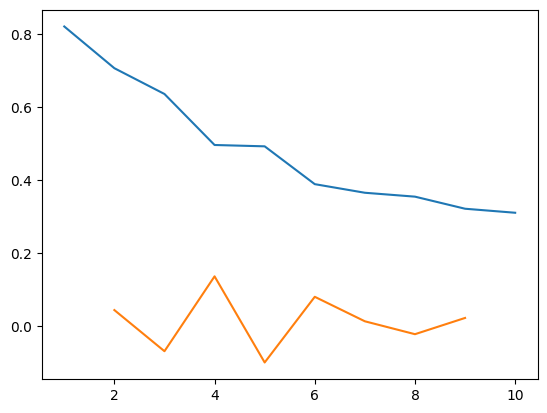

Рекомендованное количество кластеров: 4


In [39]:
# Метод локтя. Позволячет оценить оптимальное количество сегментов.
# Показывает сумму внутри групповых вариаций
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

In [41]:
#функция построения дендрограмм
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [54]:
nClust = 4

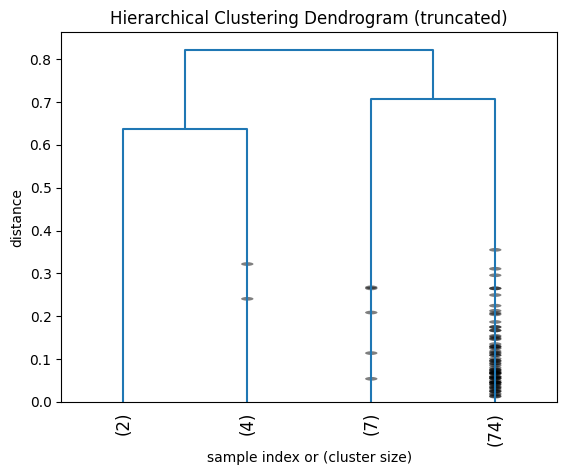

In [55]:
#строим дендрограмму 
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nClust, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

In [56]:
# иерархическая кластеризация
clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 3, 4, 4, 4,
       4, 4, 4, 3, 4, 4, 2, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 4, 2, 4, 3, 4, 3, 4, 4, 4, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype=int32)

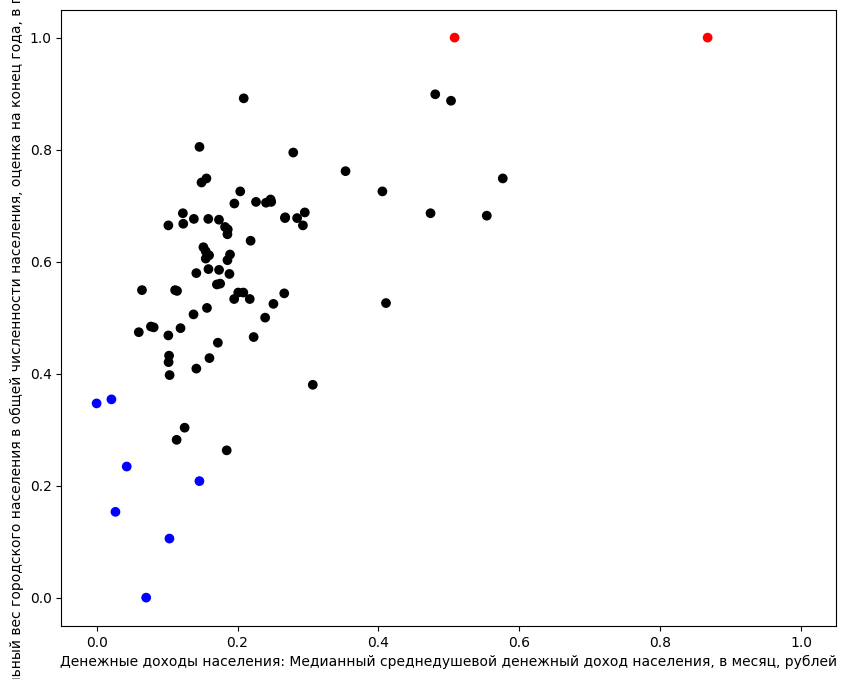

In [58]:
col = list_mini
x=0 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=1 #
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [59]:
# к оригинальным данным добавляем номер кластера
work_df['I']=clusters
res=work_df.groupby('I')[col].mean()
res['Количество']=work_df.groupby('I').size().values
res #ниже средние цифры по кластерам и количество объектов (Количество)

,"Денежные доходы населения: Медианный среднедушевой денежный доход населения, в месяц, рублей","Удельный вес городского населения в общей численности населения, оценка на конец года, в процентах","Возрастной состав населения: Население старше трудоспособного возраста, оценка на конец года, в процентах от общей численности населения",Количество
I,,,,
1,61837.050000,100.000000,26.200000,2
2,75370.375000,81.200000,16.300000,4
3,21122.385714,44.657143,15.100000,7
4,30796.017568,72.263514,24.948649,74


In [66]:
work_df[work_df['I']==1] # !!!!! меняйте номер кластера

,"Денежные доходы населения: Медианный среднедушевой денежный доход населения, в месяц, рублей","Удельный вес городского населения в общей численности населения, оценка на конец года, в процентах","Возрастной состав населения: Население старше трудоспособного возраста, оценка на конец года, в процентах от общей численности населения",I
regions,,,,
г. Москва,73458.6,100.0,26.9,1
г. Санкт-Петербург,50215.5,100.0,25.5,1


In [67]:
# строим кластеризаци методом KMeans
km = KMeans(n_clusters=nClust).fit(dataNorm)

In [68]:
# выведем полученное распределение по кластерам
# так же номер кластера, к котрому относится строка, так как нумерация начинается с нуля, выводим добавляя 1
km.labels_ +1

array([4, 3, 4, 4, 4, 1, 4, 1, 4, 1, 4, 4, 4, 4, 4, 1, 3, 3, 2, 4, 1, 1,
       1, 4, 4, 2, 4, 1, 3, 4, 4, 4, 4, 1, 4, 2, 1, 4, 4, 4, 1, 3, 1, 1,
       4, 1, 2, 4, 4, 4, 4, 2, 4, 1, 2, 4, 3, 4, 2, 1, 2, 4, 4, 1, 1, 2,
       2, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 4, 4, 1, 1],
      dtype=int32)

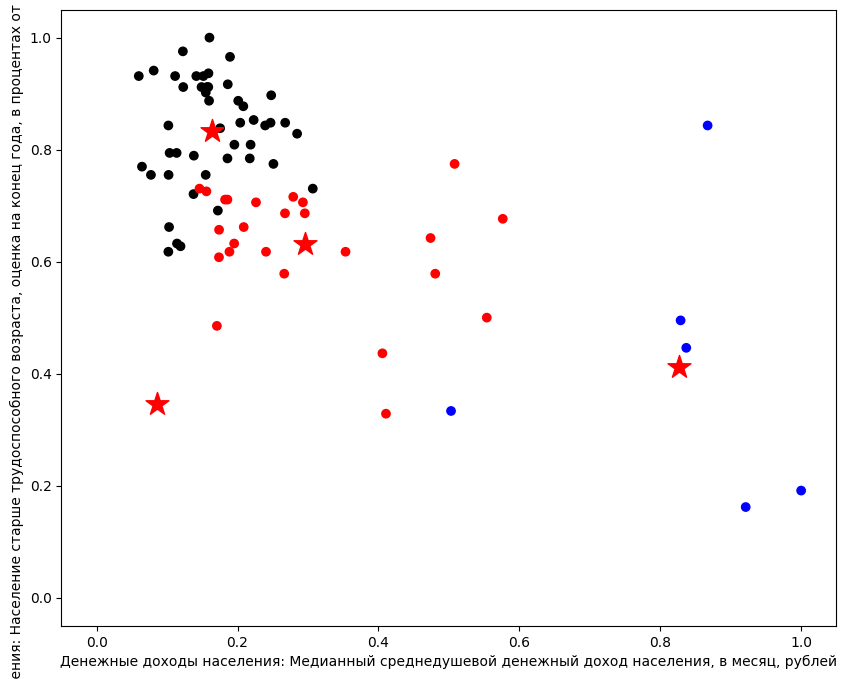

In [69]:
x=0 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=2 #
centroids = km.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=km.labels_, cmap='flag')
plt.scatter(centroids[:, x], centroids[:, y], marker='*', s=300,
            c='r', label='centroid')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [71]:
# к оригинальным данным добавляем номера кластеров
work_df['KMeans']=km.labels_+1
res=work_df.groupby('KMeans')[col].mean()
res['Количество']=work_df.groupby('KMeans').size().values
res

,"Денежные доходы населения: Медианный среднедушевой денежный доход населения, в месяц, рублей","Удельный вес городского населения в общей численности населения, оценка на конец года, в процентах","Возрастной состав населения: Население старше трудоспособного возраста, оценка на конец года, в процентах от общей численности населения",Количество
KMeans,,,,
1,36516.160000,79.228000,22.584000,25
2,22904.630000,47.250000,16.750000,10
3,70804.650000,86.166667,18.100000,6
4,27937.813043,69.884783,26.713043,46


In [78]:
work_df[work_df['KMeans']==3] # изменяйте номер кластера, содержание которого хотите просмотреть

,"Денежные доходы населения: Медианный среднедушевой денежный доход населения, в месяц, рублей","Удельный вес городского населения в общей численности населения, оценка на конец года, в процентах","Возрастной состав населения: Население старше трудоспособного возраста, оценка на конец года, в процентах от общей численности населения",I,KMeans
regions,,,,,
Ненецкий автономный округ,71497.5,74.5,18.8,2,3
Чукотский автономный округ,82049.7,69.1,13.6,2,3
Ханты-Мансийский автономный округ – Югра,49887.8,92.2,16.5,4,3
Ямало-Ненецкий автономный округ,76957.8,84.7,13.0,2,3
г. Москва,73458.6,100.0,26.9,1,3
Магаданская область,70976.5,96.5,19.8,2,3
